# Angle scans



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyscf import gto, scf, ci
import py3Dmol

In [2]:
HARTREE2KCALMOL = 627.5094737775374055927342256

## Water angle

In [3]:
def get_atom_string(r_oh1=0.9622, r_oh2=0.9622, a_hoh=104.63):
    atom_string = f"""
    O
    H  1  {r_oh1}
    H  1  {r_oh2}  2  {a_hoh}
    """
    return atom_string

In [4]:
mol = gto.Mole()
mol.atom = get_atom_string()
mol.unit = "Angstrom"
mol.basis = "cc-pvtz"
mol.verbose = 1
mol.build()

In [5]:
a_hoh_eq = 104.63
a_hoh_scan = np.linspace(70, 150, num=30)
a_hoh_energies = np.empty(a_hoh_scan.shape)

for i, a_hoh in enumerate(a_hoh_scan):
    mol.atom = get_atom_string(a_hoh=a_hoh)
    mol.build()
    mf = scf.RHF(mol)
    mf.conv_tol = 1e-12
    mf.run()
    mycc = ci.CISD(mf)
    mycc.run()
    a_hoh_energies[i] = mycc.e_tot

# Convert to kcal/mol and normalize from farthest
a_hoh_energies *= HARTREE2KCALMOL
a_hoh_energies -= np.min(a_hoh_energies)

df = pd.DataFrame({"r": a_hoh_scan, "e": a_hoh_energies})
df.to_csv("h2o-hoh-scan.csv", index=False)

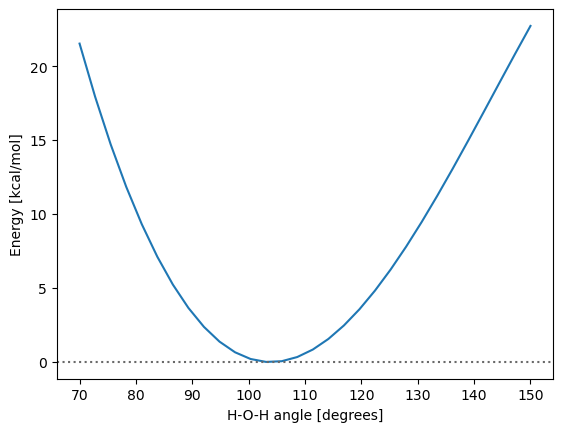

In [6]:
plt.plot(a_hoh_scan, a_hoh_energies)
plt.xlabel("H-O-H angle [degrees]")
plt.ylabel("Energy [kcal/mol]")
plt.axhline(y=0, color="dimgrey", linestyle=":")